<a href="https://colab.research.google.com/github/LeticiaMalato/Desafio-Lapes/blob/main/DesafioLapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 166.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [25]:
import pandas as pd

from  pycaret.classification import  *
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np
from itertools import combinations

In [3]:
df = pd.read_csv('startup data.csv')
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df = df.drop(columns=['Unnamed: 6','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'])
df.head(5)






,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


#O que aconteceu?

In [ ]:
total_startups = df['status'].shape[0]
total_startups

923

In [ ]:
empresas_adquiridas = df[df['status'] == 'acquired']
quantidade_empresas_adquiridas = empresas_adquiridas.shape[0]
quantidade_empresas_adquiridas

597

In [13]:
empresas_fechadas = df[df['status'] == 'closed']
quantidade_empresas_fechadas = empresas_fechadas.shape[0]
quantidade_empresas_fechadas

221

In [21]:

total_investmento = df['funding_total_usd'].sum()
print(f"Total de investimento : ${total_investmento:,.2f}")

Total de investimento : $20,422,889,626.00


In [23]:

empresas_fechad = df[df['status'] == 'closed']
total_investment_fechad = empresas_fechad['funding_total_usd'].sum()
print(f" ${total_investment_fechad:,.2f}")


 $3,613,126,026.00


In [24]:
empresas_adq = df[df['status'] == 'acquired']
total_investment_adq = empresas_adq['funding_total_usd'].sum()
print(f" ${total_investment_adq:,.2f}")

 $16,809,763,600.00


year
2001.0      2
2005.0      1
2007.0      3
2008.0     15
2009.0     28
2010.0     32
2011.0     49
2012.0    112
2013.0     93
Name: count, dtype: int64


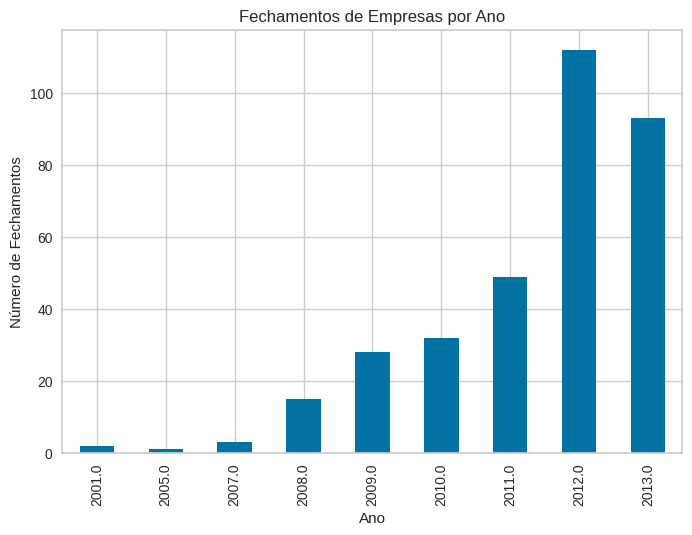

In [ ]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['year'] = df['closed_at'].dt.year
fechamentos_por_ano = df['year'].value_counts().sort_index()

print(fechamentos_por_ano)

fechamentos_por_ano.plot(kind='bar')

plt.title('Fechamentos de Empresas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Fechamentos')

plt.show()

In [ ]:
startups_fechadas = df[df['status'] == 'closed']
startups_fechadas_por_estado = startups_fechadas.groupby('state_code').size().reset_index(name='count')
startups_fechadas_por_estado = startups_fechadas_por_estado.sort_values(by='count', ascending=False)
startups_fechadas_por_estado.head(5)

,state_code,count
2,CA,156
23,NY,29
12,MA,19
29,TX,19
32,WA,18


In [ ]:
startups_adquiridas = df[df['status'] == 'acquired']
startups_adquiridas_por_estado = startups_adquiridas.groupby('state_code').size().reset_index(name='count')
startups_adquiridas_por_estado = startups_adquiridas_por_estado.sort_values(by='count', ascending=False)
startups_adquiridas_por_estado.head(5)

,state_code,count
1,CA,332
18,NY,77
9,MA,64
26,WA,24
23,TX,23


In [ ]:
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)
HeatMap(data=df[['latitude', 'longitude']].values, radius=15).add_to(mapa)
mapa

In [ ]:
produto_adq = startups_adquiridas.groupby('category_code').size().reset_index(name='count')
produto_adq = produto_adq.sort_values(by='count', ascending=False)
produto_adq.head(5)

,category_code,count
29,software,101
33,web,93
8,enterprise,56
17,mobile,52
0,advertising,45


In [ ]:
produto_fec = startups_fechadas.groupby('category_code').size().reset_index(name='count')
produto_fec = produto_fec.sort_values(by='count', ascending=False)
produto_fec.head(5)

,category_code,count
27,software,52
29,web,51
16,mobile,27
11,games_video,21
8,enterprise,17


#Por que aconteceu?

In [ ]:
media_adq = startups_adquiridas['relationships'].mean()
media_adq

9.644891122278057

In [ ]:
media_fec= startups_fechadas['relationships'].mean()
media_fec

4.168711656441718

In [ ]:
isTop500_adq = startups_adquiridas['is_top500'].sum()
isTop500_adq

537

In [ ]:
isTop500_fech = startups_fechadas['is_top500'].sum()
isTop500_fech

210

In [31]:
df['milestone_interval'] = df['age_last_milestone_year'] - df['age_first_milestone_year']
df = df[df['milestone_interval'] >= 0]

max_interval = int(df['milestone_interval'].max())

bins = range(0, max_interval + 4, 3)
labels = []
for i in bins[:-1]:
    labels.append(f'{i}-{i+2}')

df['interval_class'] = pd.cut(df['milestone_interval'], bins=bins, labels=labels, right=False)
grouped = df.groupby(['interval_class', 'milestones'])

adquiridas_percentual = []
fechadas_percentual = []
intervalos = []
milestones = []

for name, group in grouped:
    intervalos.append(name[0])
    milestones.append(name[1])
    total = len(group)
    adquiridas_contagem = len(group[group['status'] == 'acquired'])
    fechadas_contagem = len(group[group['status'] == 'closed'])

    if total > 0:
        acquired_percent = (adquiridas_contagem / total) * 100
        closed_percent = (fechadas_contagem / total) * 100
    else:
        acquired_percent = 0
        closed_percent = 0

    adquiridas_percentual.append(acquired_percent)
    fechadas_percentual.append(closed_percent)


percentages_df = pd.DataFrame({
    'interval_class': intervalos,
    'milestones': milestones,
    'Acquired (%)': adquiridas_percentual,
    'Closed (%)': fechadas_percentual
})



print("Percentuais de Empresas com Status 'Acquired' e 'Closed' conforme o Intervalo entre o Primeiro e Último Marco (classificados de 3 em 3 anos) e Quantidade de Marcos:")
print(percentages_df)

output_file = 'percentuais_intervalos_milestones.xlsx'
percentages_df.to_excel(output_file, index=False, engine='openpyxl')

from google.colab import files
files.download(output_file)

Percentuais de Empresas com Status 'Acquired' e 'Closed' conforme o Intervalo entre o Primeiro e Último Marco (classificados de 3 em 3 anos) e Quantidade de Marcos:
   interval_class  milestones  Acquired (%)  Closed (%)
0             0-2           1     59.200000   40.800000
1             0-2           2     68.656716   31.343284
2             0-2           3     81.538462   18.461538
3             0-2           4     75.000000   25.000000
4             0-2           5    100.000000    0.000000
5             0-2           6    100.000000    0.000000
6             3-5           2     83.333333   16.666667
7             3-5           3     82.500000   17.500000
8             3-5           4     85.185185   14.814815
9             3-5           5     93.333333    6.666667
10            3-5           6     66.666667   33.333333
11            3-5           8    100.000000    0.000000
12            6-8           2    100.000000    0.000000
13            6-8           3     50.000000   50.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
#Combinações com investimento
def investimento_rodadas_acumuladas_porcentagem(df, rodadas):
    porcentagem = {}


    for i in range(1, len(rodadas) + 1):
        for combo in combinations(rodadas, i):
            condition = (df[list(combo)] == 1).all(axis=1)
            total_invest = condition.sum()
            adquiridas_com_inv = df[condition & (df['status'] == 'acquired')].shape[0]
            fechadas_com_inv = df[condition & (df['status'] == 'closed')].shape[0]
            adquiridas_com_inv_percent = (adquiridas_com_inv / total_invest) * 100 if total_invest > 0 else 0
            fechadas_com_inv_percent = (fechadas_com_inv / total_invest) * 100 if total_invest > 0 else 0
            key = " + ".join(combo)
            porcentagem[key] = {
                'Acquired (Invest %)': adquiridas_com_inv_percent,
                'Closed (Invest %)': fechadas_com_inv_percent
            }

    return pd.DataFrame(porcentagem).T

rodadas = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

investimento_rodadas_acumuladas_porcentagem_df = investimento_rodadas_acumuladas_porcentagem(df, rodadas)

print("Percentuais Acumulados de Empresas com Status 'Acquired' e 'Closed' COM Investimento em Combinações de Rodadas de Financiamento:")
print(investimento_rodadas_acumuladas_porcentagem_df)

output_file = 'empresas_com_invest_porcentagem.xlsx'
investimento_rodadas_acumuladas_porcentagem_df.to_excel(output_file, index=True, engine='openpyxl')


from google.colab import files
files.download(output_file)


Percentuais Acumulados de Empresas com Status 'Acquired' e 'Closed' COM Investimento em Combinações de Rodadas de Financiamento:
                                                   Acquired (Invest %)  \
has_roundA                                                   77.565632   
has_roundB                                                   81.072555   
has_roundC                                                   82.485876   
has_roundD                                                   88.607595   
has_roundA + has_roundB                                      84.162896   
has_roundA + has_roundC                                      86.000000   
has_roundA + has_roundD                                      90.909091   
has_roundB + has_roundC                                      84.732824   
has_roundB + has_roundD                                      89.361702   
has_roundC + has_roundD                                      88.000000   
has_roundA + has_roundB + has_roundC                     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
def semInvestimento_rodada(df, rodadas):
    percentages = {}

    for i in range(1, len(rodadas) + 1):
        for combo in combinations(rodadas, i):
            condition = (df[list(combo)] == 0).all(axis=1)
            total_sem_inv = condition.sum()
            adquiridas_sem_invest = df[condition & (df['status'] == 'acquired')].shape[0]
            fechadas_sem_invest = df[condition & (df['status'] == 'closed')].shape[0]
            aquiridas_sem_inv_percent = (adquiridas_sem_invest / total_sem_inv) * 100 if total_sem_inv > 0 else 0
            fechadas_sem_inv_percent = (fechadas_sem_invest / total_sem_inv) * 100 if total_sem_inv > 0 else 0
            key = " + ".join(combo)

            percentages[key] = {
                'Acquired (Sem investimento %)' : aquiridas_sem_inv_percent ,
                'Closed (Sem investimento %)': fechadas_sem_inv_percent
            }

    return pd.DataFrame(percentages).T

rodadas = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']


sem_invest_percent_df = semInvestimento_rodada(df, rodadas)


print("Percentuais Acumulados de Empresas com Status 'Acquired' e 'Closed' SEM Investimento em Combinações de Rodadas de Financiamento:")
print(sem_invest_percent_df)


output_file = 'sem_invest_percent_df.xlsx'
sem_invest_percent_df.to_excel(output_file, index=True, engine='openpyxl')

from google.colab import files
files.download(output_file)


Percentuais Acumulados de Empresas com Status 'Acquired' e 'Closed' SEM Investimento em Combinações de Rodadas de Financiamento:
                                                   Acquired (Sem investimento %)  \
has_roundA                                                             63.920455   
has_roundB                                                             64.537445   
has_roundC                                                             68.013468   
has_roundD                                                             69.364162   
has_roundA + has_roundB                                                60.156250   
has_roundA + has_roundC                                                60.000000   
has_roundA + has_roundD                                                60.457516   
has_roundB + has_roundC                                                63.235294   
has_roundB + has_roundD                                                62.796209   
has_roundC + has_roundD        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#O que vai acontecer?

In [ ]:
df = df.drop(columns=['Unnamed: 0','state_code','latitude','longitude','zip_code','id','city','Unnamed: 6','name','labels','founded_at','closed_at','first_funding_at','last_funding_at','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year', 'category_code', 'state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate', 'is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'])
df.head(5)


,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,3,3,375000,3,0,1,0,0,0,0,1.0000,0,acquired
1,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,acquired
2,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,acquired
3,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,acquired
4,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df.status

,status
0,acquired
1,acquired
2,acquired
3,acquired
4,closed
...,...
918,acquired
919,closed
920,closed
921,acquired


In [ ]:
df['status'] = df['status'].replace({'True': 1, 'False': 0})

In [ ]:
df.status

,status
0,1
1,1
2,1
3,1
4,0
...,...
918,1
919,0
920,0
921,1


In [ ]:
s = ClassificationExperiment()
s.setup(df, target = 'status', session_id = 123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(923, 13)"
4,Transformed data shape,"(923, 13)"
5,Transformed train set shape,"(646, 13)"
6,Transformed test set shape,"(277, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7709,0.7939,0.8734,0.7964,0.8314,0.4755,0.4864,0.1870
rf,Random Forest Classifier,0.7586,0.7888,0.8709,0.7844,0.8238,0.4427,0.4535,0.3580
ada,Ada Boost Classifier,0.7569,0.7834,0.8492,0.7918,0.8188,0.4503,0.4551,0.1500
lightgbm,Light Gradient Boosting Machine,0.7431,0.7762,0.8448,0.7801,0.8091,0.4164,0.4248,0.6650
ridge,Ridge Classifier,0.7397,0.7860,0.8875,0.7549,0.8146,0.3854,0.4057,0.0630
lda,Linear Discriminant Analysis,0.7397,0.7862,0.8827,0.7571,0.8139,0.3879,0.4057,0.0330
xgboost,Extreme Gradient Boosting,0.7370,0.7746,0.8280,0.7830,0.8032,0.4071,0.4127,0.1110
et,Extra Trees Classifier,0.7276,0.7470,0.8494,0.7610,0.8016,0.3706,0.3796,0.2190
dt,Decision Tree Classifier,0.7136,0.6911,0.7676,0.7891,0.7754,0.3766,0.3816,0.0600
lr,Logistic Regression,0.6640,0.7932,0.9928,0.6635,0.7939,0.0572,0.0528,0.0470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#target= o que  a gente quer prever, que no caso é o status
X = df.drop('status', axis = 'columns')
y = df.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print('Acurácia %0f' % model.score(X_test, y_test))

Acurácia 0.790164


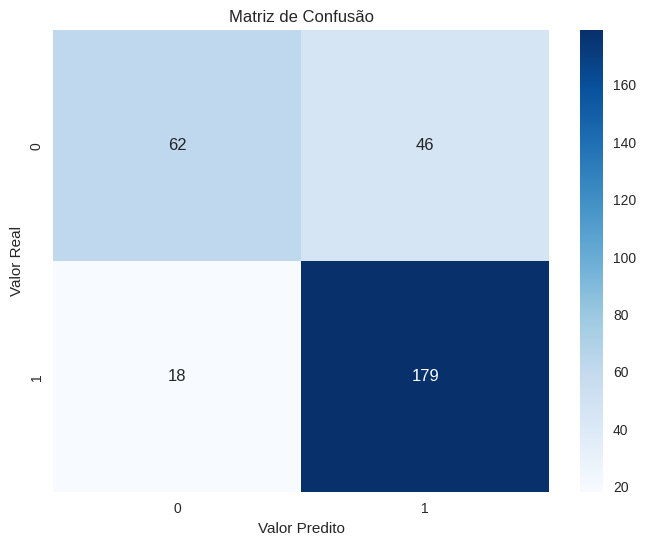

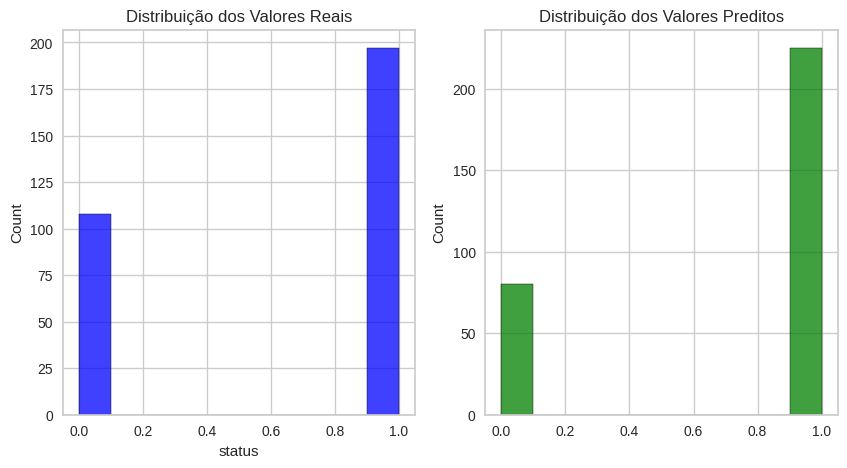

In [ ]:
y_pred = model.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Comparar distribuições entre y_test e y_pred
plt.figure(figsize=(10, 5))

# Distribuição dos valores reais
plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=False, color='blue')
plt.title('Distribuição dos Valores Reais')

# Distribuição dos valores preditos
plt.subplot(1, 2, 2)
sns.histplot(y_pred, kde=False, color='green')
plt.title('Distribuição dos Valores Preditos')

plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66       108
           1       0.80      0.91      0.85       197

    accuracy                           0.79       305
   macro avg       0.79      0.74      0.75       305
weighted avg       0.79      0.79      0.78       305



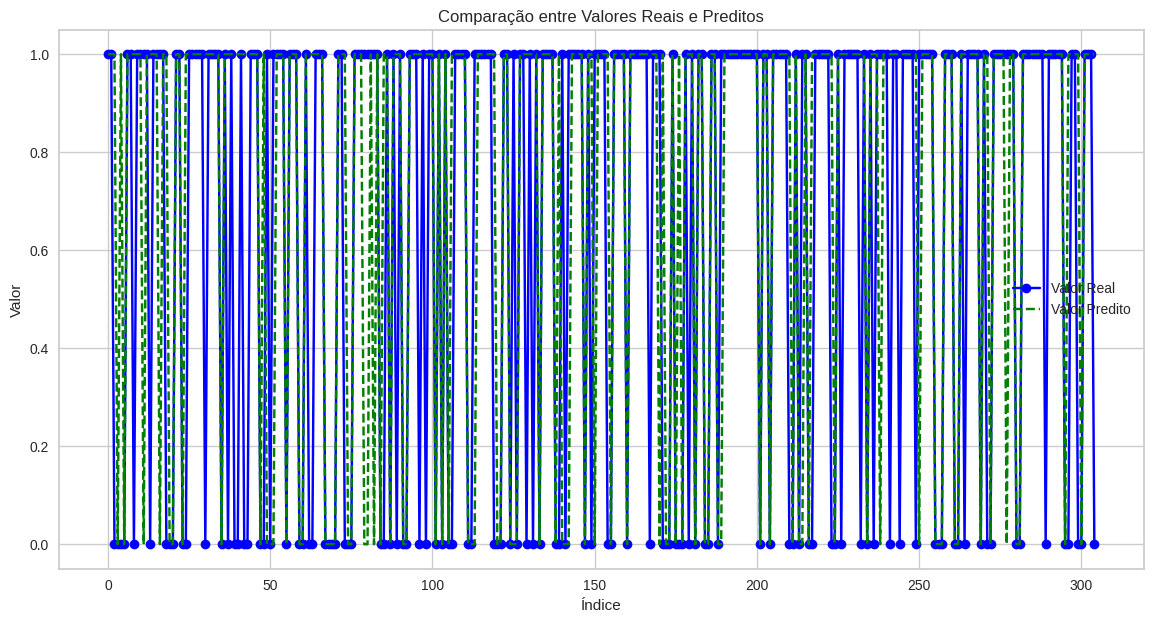

In [ ]:
y_pred = model.predict(X_test)

# Criar um gráfico de linhas para comparar y_test e y_pred
plt.figure(figsize=(14, 7))

# Plotar os valores reais
plt.plot(y_test.values, label='Valor Real', color='blue', linestyle='-', marker='o')

# Plotar os valores preditos
plt.plot(y_pred, label='Valor Predito', color='green', linestyle='--', marker='x')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,